In [1]:
from scipy.optimize import differential_evolution
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
%config Completer.use_jedi = False
showOriginalModelString = True
# load the samples from the original model
with open('observations.json') as json_file:
    observations = json.load(json_file)

{'IL8': [{'mean': [10000, 19000, 26000, 29500, 32000], 'std': [0, 0, 0, 0, 0]}, {'mean': [16000, 21000, 30000, 38000, 37000], 'std': [0, 3000, 0, 1000, 1000]}], 'IL1b': [{'mean': [1700, 2950, 2600, 3000, 3400], 'std': [200, 200, 450, 150, 300]}, {'mean': [1950, 1200, 1000, 1700, 1950], 'std': [750, 350, 0, 200, 250]}]}
{'mean': [10000, 19000, 26000, 29500, 32000], 'std': [0, 0, 0, 0, 0]}
{'mean': [16000, 21000, 30000, 38000, 37000], 'std': [0, 3000, 0, 1000, 1000]}
{'mean': [1700, 2950, 2600, 3000, 3400], 'std': [200, 200, 450, 150, 300]}
{'mean': [1950, 1200, 1000, 1700, 1950], 'std': [750, 350, 0, 200, 250]}


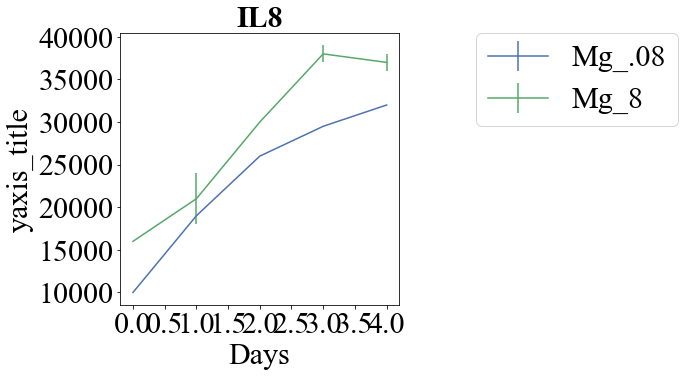

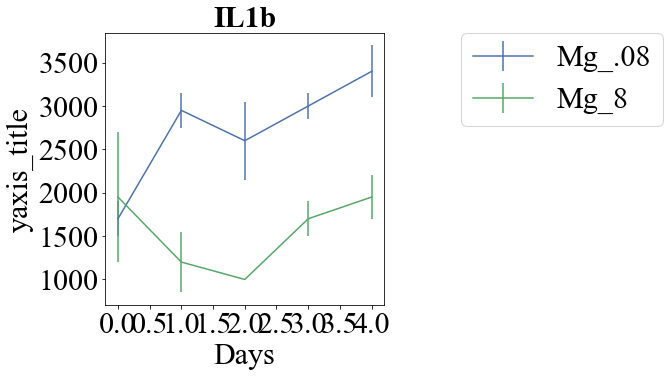

In [2]:
class GSs:
    graph_size = [5,5]
#     study = 'Saldana_2019_part1'
    study = 'Quao_2021'
    colors = ['lime' , 'violet', 'yellowgreen', 'peru', 'skyblue']
    legend_font_size = 30
    tick_font_size = 30
    title_font_size = 30
    delta = .1 # gap between exp and sim 

def sort(observations,targets):
    exp_tag_results = {}
    for tag in targets:
        exp_tag_results[tag] = []
    for tag in targets:
        for ID in observations['IDs']:
            ID_observations = observations[ID]['expectations']
            exp_tag_results[tag].append(ID_observations[tag])

    return exp_tag_results
def bar_positions(targets,IDs):
    for i in range(len(targets)):
        x_exp =[float(j) + GSs.delta for j in range(len(IDs))]
        x_sim =[float(j) - GSs.delta for j in range(len(IDs))]
    return x_exp,x_sim

targets = observations[GSs.study]['measurement_scheme'].keys()
IDs = observations[GSs.study]['IDs']
exp_tag_results = sort(observations[GSs.study],targets)
print(exp_tag_results)
for tag,ii in zip(targets,range(len(targets))):
    fig = plt.figure(figsize=(GSs.graph_size[0],GSs.graph_size[1]))
    fig.canvas.draw()
    ax = fig.add_subplot(1, 1, 1)
    for item,jj in zip(exp_tag_results[tag],range(len(IDs))):
        print(item)
        means = item['mean']
        stds = item['std']
        ax.errorbar(x=range(len(means)),y=means, yerr = stds,
                    label = IDs[jj]
                 
                 )
#     ax.bar(x=x_sim,height=sim_tag_results[tag],width = GSs.bar_width, label = "Sim", facecolor = GSs.colors[ii+1],
#              edgecolor="black", yerr =  0,
#              error_kw = dict(capsize= GSs.error_bar_width))
    ax.legend(bbox_to_anchor=(2, 1),loc = 'upper right', borderaxespad=0.,prop={ 'family':'Times New Roman','size':GSs.legend_font_size},ncol=1)
#     ax.set_ylim(yrange)
#     labels = [item.get_text() for item in ax.get_xticklabels()]
#     ax.set_xticks(ticks = [int(i) for i in x_labels])
#     ax.set_xticklabels(x_labels_adj)
#     ax.get_yaxis().set_major_formatter(
#         matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)/1000, ',')))
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Times New Roman')
        label.set_fontsize(GSs.tick_font_size)
    ax.set_ylabel('yaxis_title',fontdict ={'family':'Times New Roman','size':GSs.title_font_size})
    ax.set_xlabel('Days',fontdict ={'family':'Times New Roman','size':GSs.title_font_size})
    
    ax.set_title(tag,fontdict ={'family':'Times New Roman','size':GSs.title_font_size, 'fontweight':'bold'})
